In [1]:
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

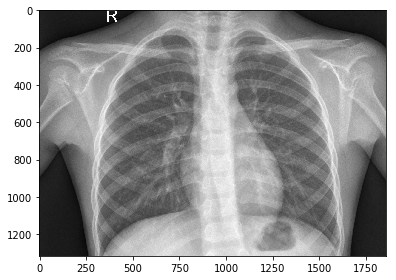

In [2]:
image = imread('/Users/mithunkumar/Documents/PhD/COVID Research/COVIDE/chest_xray/test/NORMAL/IM-0001-0001.jpeg', as_gray=True)
imshow(image)

In [3]:
#checking image shape 
image.shape, image

((1317, 1857), array([[ 0, 32, 33, ..., 33, 34,  0],
        [ 0, 33, 33, ..., 34, 34,  0],
        [ 1, 33, 33, ..., 34, 34,  0],
        ...,
        [ 0, 28, 28, ..., 34, 35,  0],
        [ 0, 29, 28, ..., 34, 35,  0],
        [ 0, 29, 29, ..., 35, 34,  0]], dtype=uint8))

In [4]:
#pixel features

features = np.reshape(image, (660*450))

features.shape, features

ValueError: cannot reshape array of size 2445669 into shape (297000,)

In [5]:
image.shape

(1317, 1857)

In [6]:
image

array([[ 0, 32, 33, ..., 33, 34,  0],
       [ 0, 33, 33, ..., 34, 34,  0],
       [ 1, 33, 33, ..., 34, 34,  0],
       ...,
       [ 0, 28, 28, ..., 34, 35,  0],
       [ 0, 29, 28, ..., 34, 35,  0],
       [ 0, 29, 29, ..., 35, 34,  0]], dtype=uint8)

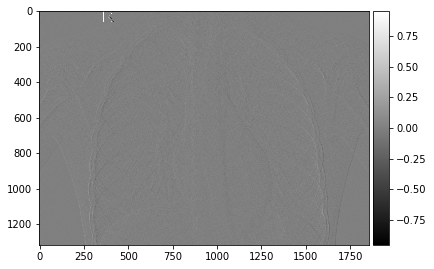

In [8]:
from skimage.filters import prewitt_h,prewitt_v

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

(128, 64)


/opt/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


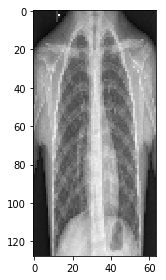

In [10]:
from skimage.transform import resize
#resizing image 
resized_img = resize(image, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [13]:
from skimage.feature import hog
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

In [14]:
fd.shape

(3780,)

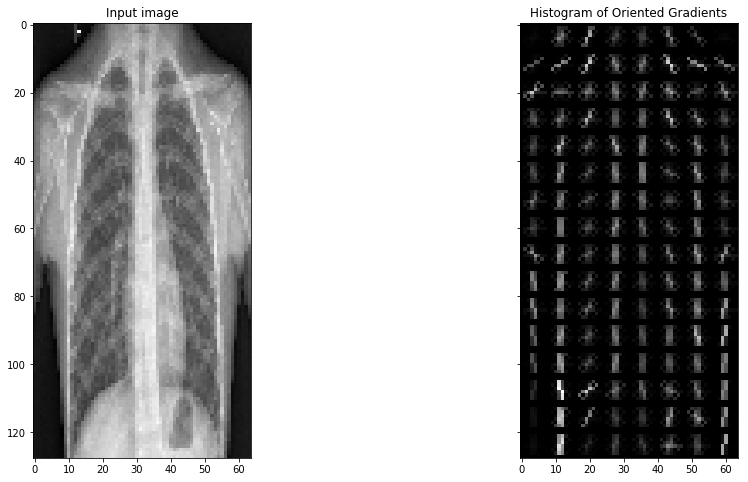

In [16]:
from skimage import exposure

#HOG image

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()